In [2]:
data = pd.read_csv('212_fallzeit.csv')
data['Dichte'] += 0.0025 
data['Dichte'] /= 1000
display(data)

,Kugeldurchmesser,Fallstrecke,Fallzeit 1,Fallzeit 2,Fallzeit 3,Fallzeit 4,Fallzeit 5,Dichte
0,9.000,200,6.28,6.07,6.15,6.14,6.12,0.001362
1,8.000,200,7.82,7.58,7.50,7.72,7.50,0.001357
2,7.144,200,8.45,8.26,8.58,8.29,8.51,0.001378
3,6.000,200,11.39,11.39,11.32,11.21,11.39,0.001378
4,5.000,200,15.23,15.32,15.54,15.58,15.53,0.001378
5,4.000,100,12.32,12.00,12.06,12.36,12.15,0.001378
6,3.000,50,10.39,10.20,10.29,10.06,10.28,0.001378
7,2.000,50,20.39,20.51,20.51,19.73,19.34,0.001378
8,1.500,50,33.93,34.04,34.82,34.48,33.89,0.001392


In [3]:
v = pd.DataFrame([data.iloc[:,1]/i[1] for i in list(data.loc[:,'Fallzeit 1':'Fallzeit 5'].iteritems())]).transpose()
vm = v.mean(axis=1)

ds = data['Kugeldurchmesser']/2
ds[6:] = ds[6:]*2

dt = 0.2

dv = sqrt(((dt/data.loc[:,'Fallzeit 1':'Fallzeit 5'])**2).add((ds/data['Fallstrecke'])**2, axis=0))
dv.columns = v.columns
dv *= v

dvm = sqrt((dv**2).sum(axis=1))/sqrt(5)

r_f = 1.1466/1000
dr_f = 0.0002/1000

dr_k = 0.0025/1000

vs,r_fs,r_ks = sm.symbols('v \\rho_f \\rho_k')
dvs,dr_fs,dr_ks = sm.symbols('dv d\\rho_f d\\rho_k')
f = vs/(r_ks - r_fs)

import fehler
f_abs, f_rel = fehler.fehler(f, vs, r_fs, r_ks)

y = array([f.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i])]) for i in range(9)], dtype=float)
dy = array([f_abs.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i]),
                        (dvs, dvm[i]), (dr_fs, dr_f), (dr_ks, dr_k)]) for i in range(9)], dtype=float)

rsq = (data['Kugeldurchmesser']/2)**2

import scipy.optimize as o
g = lambda x, m: m*x
mp, mc = o.curve_fit(g, rsq, y, sigma=dy)
m = mp[0]
dm = sqrt(mc[0][0])
display(Math('m={0} \pm {1}'.format(m, dm)))
display(Latex("${}$".format(sm.latex(f))))
display(Latex("${}$".format(sm.latex(f_abs))))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

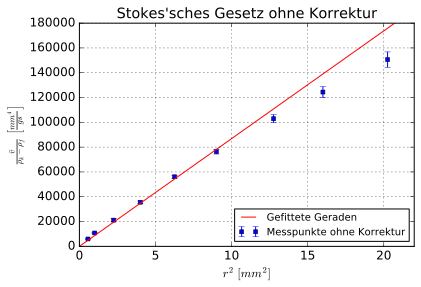

In [4]:
figure()
errorbar(rsq, y, yerr=dy, fmt='s', markersize=4.0, label='Messpunkte ohne Korrektur')
plot(arange(0,25,0.1), g(arange(0,25,0.1), m), 'r-', label='Gefittete Geraden')
xlim(0, 22)
ylim(0, 180000)
xlabel(r'$r^2 \ [mm^2]$')
ylabel(r'$\frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$')
title("Stokes'sches Gesetz ohne Korrektur")
grid()
legend(loc=4, fontsize=10)
show()

In [5]:
R = 75/2
l = 1 + 2.1 * (data['Kugeldurchmesser']/2)/R

y_ = y * l

rs, drs = sm.symbols('r dr')
f_ = vs/(r_ks - r_fs) * (1 + 2.1 * rs/R)
f_abs_, f_rel_ = fehler.fehler(f_, vs, r_fs, r_ks, rs)

dy_ = array([f_abs_.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i]), (rs, data['Kugeldurchmesser'][i]/2),
                          (dvs, dvm[i]), (dr_fs, dr_f), (dr_ks, dr_k),
                          (drs, data['Kugeldurchmesser'][i]*0.01)]) for i in range(9)], dtype=float)

m_ = o.curve_fit(g, rsq, y_, sigma=dy_)
dm_ = sqrt(m_[1][0][0])
m_ = m_[0][0]
display(Math('m\'={0} \pm {1}'.format(m_, dm_)))
display(Latex("${}$".format(sm.latex(f_))))
display(Latex("${}$".format(sm.latex(f_abs_))))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

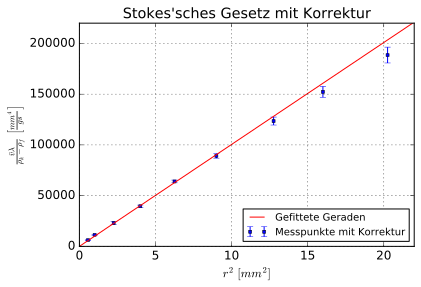

In [6]:
figure()
errorbar(rsq, y_, yerr=dy_, fmt='s', markersize=3.0, label='Messpunkte mit Korrektur')
plot(arange(0,25,0.1), g(arange(0,25,0.1), m_), 'r-', label='Gefittete Geraden')
xlim(0, 22)
ylim(0, 220000)
xlabel(r'$r^2 \ [mm^2]$')
ylabel(r'$\frac{{\bar{{v}} \lambda}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$')
title("Stokes'sches Gesetz mit Korrektur")
grid()
legend(loc=4, fontsize=10)
show()

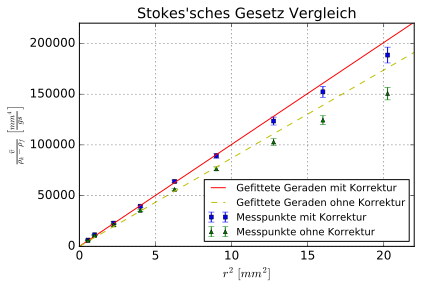

In [7]:
figure()

errorbar(rsq, y_, yerr=dy_, fmt='bs', markersize=4.0, label='Messpunkte mit Korrektur')
plot(arange(0,25,0.1), g(arange(0,25,0.1), m_), 'r-', label='Gefittete Geraden mit Korrektur')

errorbar(rsq, y, yerr=dy, fmt='g^', markersize=4.0, label='Messpunkte ohne Korrektur')
plot(arange(0,25,0.1), g(arange(0,25,0.1), m), 'y--', label='Gefittete Geraden ohne Korrektur')

xlim(0, 22)
ylim(0, 220000)
xlabel(r'$r^2 \ [mm^2]$')
ylabel(r'$\frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$')
title("Stokes'sches Gesetz Vergleich")
grid()
legend(loc=4, fontsize=10)
show()

In [40]:
g_ = 9.80984 * 1000
n = 2/9 * g_ / m_
dn = n * dm_/m_
display(Latex(r'$\eta = {0} \pm {1} $'.format(n, dn)))

v_lam = m_ * (data['Dichte'] - r_f) * rsq
dv_lam = v_lam * sqrt((dm_/m_)**2 + (dr_k/(data['Dichte'] - r_f))**2 + (dr_f/(data['Dichte'] - r_f))**2 + (2*0.01)**2)

h = vm/v_lam
dh = h * sqrt((dvm/vm)**2 + (dv_lam/v_lam)**2)

Rey = r_f * vm * data['Kugeldurchmesser']/n
dRey = Rey * sqrt((dr_f/r_f)**2 + (dvm/vm)**2 + (dn/n)**2 + (0.01)**2)

<IPython.core.display.Latex object>

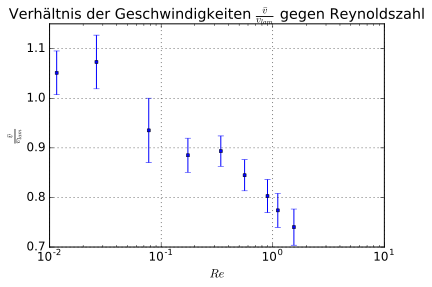

In [9]:
figure()
errorbar(Rey, h, yerr=dh, fmt='bs')
grid()
xscale('log')
xlabel('$Re$')
ylabel(r'$\frac{{\bar{{v}}}}{{v_{{lam}}}}$')
xlim(10**(-2),10)
title(r'Verhältnis der Geschwindigkeiten $\frac{{\bar{{v}}}}{{v_{{lam}}}}$ gegen Reynoldszahl')
show()

In [10]:
pt_vm = pd.DataFrame(data=[data['Kugeldurchmesser'], 
                           pd.Series(vm, name=r'$\bar{{v}} \ \left[ \frac{{mm}}{{s}} \right]$'),
                           pd.Series(dvm, name=r'$\Delta \bar{{v}}$')
                          ]).round(3)
display(pt_vm)

,0,1,2,3,4,5,6,7,8
Kugeldurchmesser,9.000,8.000,7.144,6.000,5.000,4.000,3.000,2.000,1.500
$\bar{{v}} \ \left[ \frac{{mm}}{{s}} \right]$,32.514,26.240,23.764,17.637,12.954,8.213,4.881,2.489,1.461
$\Delta \bar{{v}}$,1.286,0.866,0.707,0.408,0.233,0.213,0.308,0.103,0.045


In [11]:
pt_y = pd.DataFrame(data=[data['Kugeldurchmesser'],
                    pd.Series(y, name=r'$\frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$'),
                    pd.Series(dy, name=r'$\Delta \frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$'),
                    pd.Series(y_, name=r'$\frac{{\bar{{v}}\lambda}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$'),
                    pd.Series(dy_, name=r'$\Delta \frac{{\bar{{v}}\lambda}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$')
                    ]).round(0)
display(pt_y)

,0,1,2,3,4,5,6,7,8
Kugeldurchmesser,9,8,7,6,5,4,3,2,2
$\frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$,150597,124420,102918,76385,56104,35568,21141,10782,5941
$\Delta \frac{{\bar{{v}}}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$,6208,4366,3259,1954,1180,998,1354,460,191
$\frac{{\bar{{v}}\lambda}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$,188547,152290,123505,89218,63959,39552,22917,11385,6190
$\Delta \frac{{\bar{{v}}\lambda}}{{\rho_k-\rho_f}} \ \left[\frac{{mm^4}}{{gs}}\right]$,7809,5373,3932,2296,1354,1113,1468,486,200


In [12]:
pt_vlam = pd.DataFrame(data=[data['Kugeldurchmesser'], 
                           pd.Series(vm, name=r'$\bar{{v}} \ \left[ \frac{{mm}}{{s}} \right]$'),
                           pd.Series(dvm, name=r'$\Delta \bar{{v}}$'),
                            pd.Series(v_lam, name=r'$v_{{lam}} \ \left[ \frac{{mm}}{{s}} \right]$'),
                           pd.Series(dv_lam, name=r'$\Delta v_{{lam}}$')
                          ]).round(3)
display(pt_vlam)

,0,1,2,3,4,5,6,7,8
Kugeldurchmesser,9.000,8.000,7.144,6.000,5.000,4.000,3.000,2.000,1.500
$\bar{{v}} \ \left[ \frac{{mm}}{{s}} \right]$,32.514,26.240,23.764,17.637,12.954,8.213,4.881,2.489,1.461
$\Delta \bar{{v}}$,1.286,0.866,0.707,0.408,0.233,0.213,0.308,0.103,0.045
$v_{{lam}} \ \left[ \frac{{mm}}{{s}} \right]$,43.923,33.901,29.598,20.878,14.498,9.279,5.219,2.320,1.390
$\Delta v_{{lam}}$,1.289,0.999,0.860,0.607,0.421,0.270,0.152,0.067,0.040


In [16]:
pt_re = pd.DataFrame(data=[data['Kugeldurchmesser'],
                           pd.Series(h, name=r'$\frac{{\bar{{v}}}}{{v_{{lam}}}}$'),
                           pd.Series(dh, name=r'$\Delta \frac{{\bar{{v}}}}{{v_{{lam}}}}$'),
                           pd.Series(Rey, name='$Re$'),
                           pd.Series(dRey, name='$\Delta Re$')
                          ]).round(3)
display(pt_re)

,0,1,2,3,4,5,6,7,8
Kugeldurchmesser,9.000,8.000,7.144,6.000,5.000,4.000,3.000,2.000,1.500
$\frac{{\bar{{v}}}}{{v_{{lam}}}}$,0.740,0.774,0.803,0.845,0.894,0.885,0.935,1.073,1.051
$\Delta \frac{{\bar{{v}}}}{{v_{{lam}}}}$,0.036,0.034,0.033,0.031,0.031,0.034,0.065,0.054,0.044
$Re$,1.546,1.109,0.897,0.559,0.342,0.174,0.077,0.026,0.012
$\Delta Re$,0.069,0.043,0.032,0.017,0.009,0.006,0.005,0.001,0.000


In [33]:
V = array([5, 10, 15, 20, 25]) * 1000
T = array([133.45, 270.75, 409.10, 546.80, 686.43])

dV = 500

VT = V/T
dVT = VT * sqrt((dt/T)**2 + (dV/V)**2)

VTm = VT.mean()
dVTm = sqrt(sum(dVT**2))/5

h1 = 516
h2 = 511
dh1 = 1
dh2 = 1

p_diff = r_f * g_ * (h1+h2)/2
dp_diff = p_diff * sqrt((dr_f/r_f)**2 + (dh1/(h1+h2))**2 + (dh2/(h1+h2))**2)

L = 100
dL = 0.5

r = 1.5/2
dr = 0.01/2

nHP = (pi * p_diff * r**4)/(8*VTm*L)
dnHP = nHP * sqrt((dp_diff/p_diff)**2 + (4*dr/r)**2 + (dVTm/VTm)**2 + (dL/L)**2)

display(VTm)
display(dVTm)
display(Latex(r"$\Delta p = {0} \pm {1}$".format(p_diff, dp_diff)))
display(Latex(r"$\eta = {0} \pm {1}$".format(nHP, dnHP)))
display(pd.DataFrame([VT, dVT], columns=range(1,6), index=[r'$\frac{{V}}{{T}} \ [\frac{{mm^3}}{{s}}]$',
                                                           r'$\Delta \frac{{V}}{{T}}$']))

36.812854763332723

0.9014055667847124

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,1,2,3,4,5
$\frac{{V}}{{T}} \ [\frac{{mm^3}}{{s}}]$,37.467216,36.934441,36.665852,36.576445,36.420320
$\Delta \frac{{V}}{{T}}$,3.747142,1.846924,1.222327,0.914509,0.728484


In [39]:
Re = (2*r_f*VTm)/(pi*nHP*r)
dRe = Re*sqrt((dr_f/r_f)**2 + (dVTm/VTm)**2 + (dnHP/nHP)**2 + (dr/r)**2)

display(VTm/(pi*r**2*1000))

display(Latex(r"$Re={0} \pm {1} $".format(Re, dRe)))

0.020831814417452188

<IPython.core.display.Latex object>